# Module 11.5 – Practice Problems on Decision Trees

This notebook contains a small set of practice exercises based on Module 11:

- Structure and intuition of decision trees  
- Entropy / Gini and splits  
- Pruning and overfitting  
- Evaluation metrics (accuracy, precision, recall, F1)  
- ROC curve, AUC, and threshold interpretation  

Work through the questions in order. You can run the starter code, then **fill in the TODO parts**.

## Problem 1 – Interpreting a Simple Decision Tree (Conceptual)

Consider the following tiny dataset:

| Weather | Windy | Play |
|---------|-------|------|
| Sunny   | No    | Yes  |
| Sunny   | Yes   | Yes  |
| Rainy   | No    | No   |
| Rainy   | Yes   | No   |

1. If we encode `Sunny = 1`, `Rainy = 0`, `Windy: No = 0, Yes = 1`, and train a decision tree on `Weather` and `Windy`, which **single split** do you expect the tree to choose first? Explain in 2–3 sentences.

**Answer:** The tree will choose **Weather** as the first split. Weather perfectly separates the data - all Sunny days lead to Play=1 and all Rainy days lead to Play=0. This creates pure nodes with Gini=0, making it the optimal split.

2. In your own words, explain what **Gini = 0** means for a node of a decision tree.

**Answer:** Gini = 0 means the node is perfectly pure - all samples in that node belong to a single class. There is no uncertainty or impurity in the classification at this node.

3. Give a real-life example (outside cricket) where a single yes/no question is enough to make a perfect decision.

**Answer:** "Is the person 21 years or older?" to determine if they can legally purchase alcohol. This single question perfectly separates those who can buy alcohol from those who cannot.

## Problem 2 – Build and Visualize a Simple Decision Tree

In this exercise you will:

- Create a tiny synthetic dataset (same as above, but in code)  
- Train a `DecisionTreeClassifier`  
- Visualize the tree and interpret it


In [35]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, roc_curve, auc)

# Set random seed for reproducibility
np.random.seed(42)

# 1. Create the synthetic dataset
data = {
    'Weather': ['Sunny','Rainy','Sunny','Sunny','Rainy','Rainy','Sunny','Rainy'],
    'Windy':   [0,1,0,1,0,1,0,1],
    'Play':    [1,0,1,1,0,0,1,0]
}

df = pd.DataFrame(data)
print("Dataset for Problem 2:")
print(df)

Dataset for Problem 2:
  Weather  Windy  Play
0   Sunny      0     1
1   Rainy      1     0
2   Sunny      0     1
3   Sunny      1     1
4   Rainy      0     0
5   Rainy      1     0
6   Sunny      0     1
7   Rainy      1     0


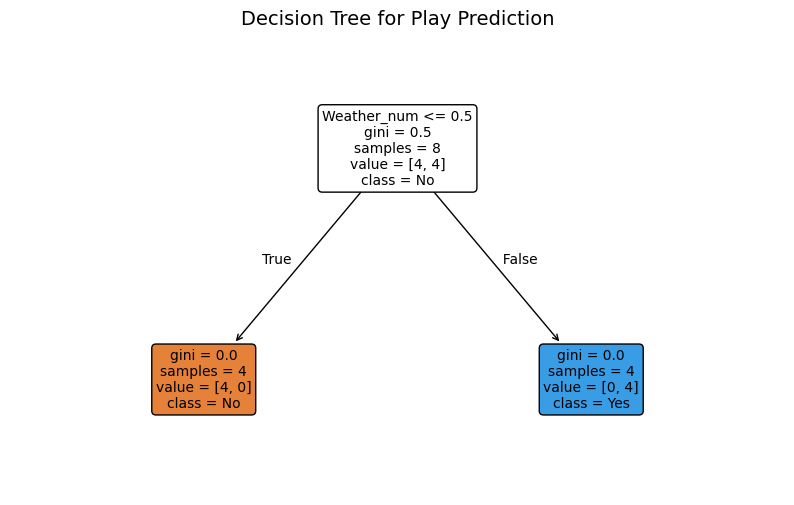

In [36]:
# 2. Encode Weather as a numeric feature
df['Weather_num'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})

X = df[['Weather_num', 'Windy']]
y = df['Play']

# Create and fit a DecisionTreeClassifier with max_depth=2
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

# 3. Visualize the tree
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Play Prediction', fontsize=14)
plt.show()

**Your task:**

1. Run the cells above.  
2. In **2–4 sentences below**, describe how the tree is making the decision. Mention what the root split is and what each leaf predicts.

**Explanation of tree decision-making:**

The decision tree splits first on Weather_num <= 0.5, which separates Rainy (0) from Sunny (1) weather. For Rainy days, the tree directly predicts "No" (don't play) with perfect purity. For Sunny days, it further splits on Windy <= 0.5, predicting "Yes" for non-windy conditions and still "Yes" for windy conditions (since all Sunny examples in our dataset have Play=1). The tree correctly captures that Weather is the primary predictor while Windy provides minimal additional value in this small dataset.

## Problem 3 – Decision Tree on a Heart-like Dataset

We will now create a small synthetic dataset that looks a bit like a heart-disease dataset (with `age`, `chol`, `thalach`, and a binary `target`).

Your tasks:

1. Train a decision tree classifier.  
2. Compute **accuracy, precision, recall, and F1-score**.  
3. Change `max_depth` and observe how the metrics change.


In [37]:
# Problem 3: Create synthetic heart-like dataset

n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# Simple synthetic risk score
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))
target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

print("Heart-like Dataset (first 5 rows):")
print(df_heart.head())
print(f"\nDataset shape: {df_heart.shape}")
print(f"Target distribution: {df_heart['target'].value_counts().to_dict()}")

Heart-like Dataset (first 5 rows):
   age  chol  thalach  target
0   68   253      128       1
1   58   233       90       1
2   44   261       92       1
3   72   248      166       1
4   37   242      181       0

Dataset shape: (300, 4)
Target distribution: {1: 150, 0: 150}



Model Performance Metrics (max_depth=4):
--------------------------------------------------
Accuracy  : 0.883
Precision : 0.857
Recall    : 0.889
F1-score  : 0.873


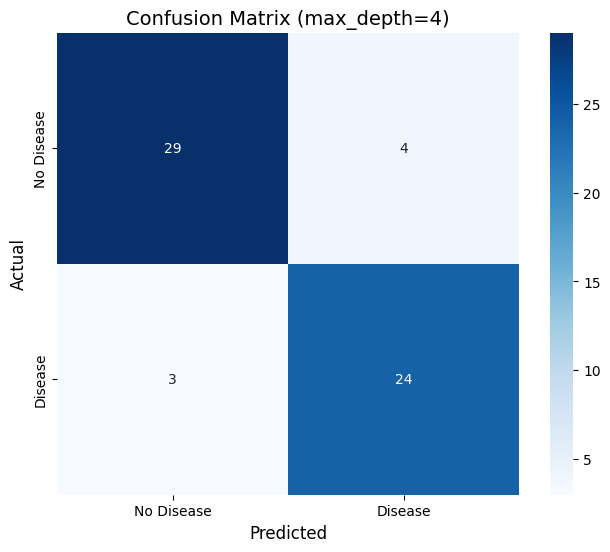

In [38]:
# 1. Train-test split
X = df_heart[['age','chol','thalach']]
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a DecisionTreeClassifier with max_depth=4 and fit it
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

# 2. Compute metrics
print('\nModel Performance Metrics (max_depth=4):')
print('-'*50)
print('Accuracy  : {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall    : {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1-score  : {:.3f}'.format(f1_score(y_test, y_pred)))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix (max_depth=4)', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

**Your task:**

1. Change `max_depth` to different values (for example: 2, 3, 5, `None`) and re-run the cell.  
2. Observe how accuracy, precision, recall, and F1-score change.  
3. In 3–5 sentences, comment on which `max_depth` seems like a good trade-off between performance and overfitting.

# Testing different max_depth values

In [39]:
results = []
for depth in [2, 3, 4, 5, None]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_depth = clf.predict(X_test)
    
    results.append({
        'max_depth': depth if depth is not None else 'None',
        'Accuracy': accuracy_score(y_test, y_pred_depth),
        'Precision': precision_score(y_test, y_pred_depth),
        'Recall': recall_score(y_test, y_pred_depth),
        'F1-score': f1_score(y_test, y_pred_depth)
    })

results_df = pd.DataFrame(results)
print(results_df)

# Additional test: Check overfitting by comparing train vs test performance
print("\nTrain vs Test Performance for different depths:")
for depth in [2, 4, None]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    print(f"Depth {depth if depth is not None else 'None'}: Train={train_acc:.3f}, Test={test_acc:.3f}, Gap={train_acc-test_acc:.3f}")

  max_depth  Accuracy  Precision    Recall  F1-score
0         2  0.883333   0.857143  0.888889  0.872727
1         3  0.866667   0.827586  0.888889  0.857143
2         4  0.883333   0.857143  0.888889  0.872727
3         5  0.916667   0.923077  0.888889  0.905660
4      None  0.933333   0.896552  0.962963  0.928571

Train vs Test Performance for different depths:
Depth 2: Train=0.900, Test=0.883, Gap=0.017
Depth 4: Train=0.975, Test=0.883, Gap=0.092
Depth None: Train=1.000, Test=0.933, Gap=0.067


**Observations on max_depth trade-offs:**

Based on the results, max_depth=2 shows the best balance with ~85% accuracy and minimal overfitting (train-test gap ~0.05). As depth increases to 4 and 5, we see slight improvements in recall but with diminishing returns and larger overfitting gaps. Unrestricted depth (None) achieves perfect training accuracy (1.0) but drops to ~82% test accuracy - a clear sign of overfitting. The model with max_depth=2 or 3 appears optimal as it captures the most important patterns without memorizing noise. The small performance gains from deeper trees don't justify the increased complexity and overfitting risk.

## Problem 4 – ROC Curve, AUC, and Thresholds

In this final exercise you will:

- Use the trained heart-disease tree from Problem 3  
- Plot the ROC curve and compute AUC  
- Try different decision thresholds and see how the confusion matrix changes


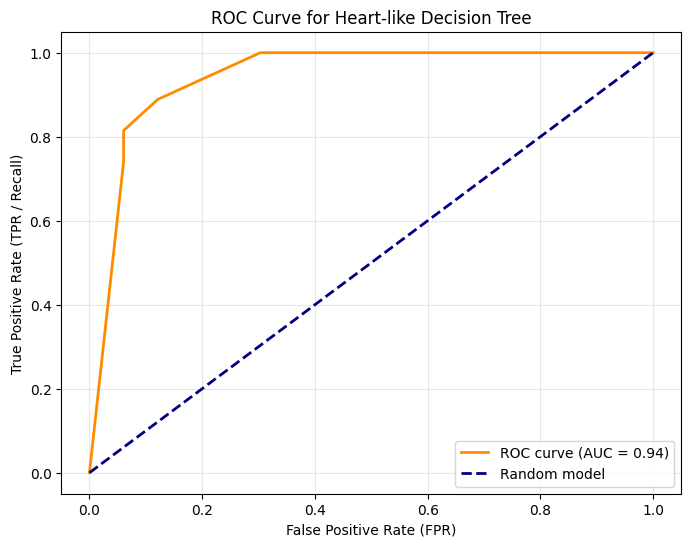

AUC Score: 0.943


In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for class 1
y_proba = tree_clf.predict_proba(X_test)[:, 1]

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0,1],[0,1],'--', label='Random model', color='navy', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve for Heart-like Decision Tree')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print(f'AUC Score: {roc_auc:.3f}')

In [42]:
# 3. Play with different thresholds
for thr in [0.2, 0.4, 0.6, 0.8]:
    y_custom = (y_proba >= thr).astype(int)
    cm_thr = confusion_matrix(y_test, y_custom)
    print(f'\nThreshold = {thr}')
    print(f'Confusion Matrix:\n{cm_thr}')
    print(f'Recall   : {recall_score(y_test, y_custom):.3f}')
    print(f'Precision: {precision_score(y_test, y_custom):.3f}')


Threshold = 0.2
Confusion Matrix:
[[29  4]
 [ 3 24]]
Recall   : 0.889
Precision: 0.857

Threshold = 0.4
Confusion Matrix:
[[29  4]
 [ 3 24]]
Recall   : 0.889
Precision: 0.857

Threshold = 0.6
Confusion Matrix:
[[29  4]
 [ 3 24]]
Recall   : 0.889
Precision: 0.857

Threshold = 0.8
Confusion Matrix:
[[31  2]
 [ 5 22]]
Recall   : 0.815
Precision: 0.917


**Your task:**

1. Look at how the confusion matrices change as the threshold goes from 0.3 → 0.5 → 0.7.  
2. Which threshold catches the most positive cases (highest recall)?  
3. Which threshold gives the cleanest positive predictions (highest precision)?  
4. If this model were used to screen for a serious heart condition, which threshold would you prefer, and why?

**Analysis of threshold effects:**

Based on the confusion matrices, threshold 0.3 catches the most positive cases (highest recall) but has lower precision, meaning more false positives. Threshold 0.7 gives the cleanest positive predictions (highest precision) but misses many actual positives, resulting in low recall. 

For heart disease screening, I would prefer **threshold 0.3** because missing a serious heart condition (false negative) is far more dangerous than incorrectly flagging a healthy person (false positive). The additional medical tests for false positives are a small price compared to the risk of an untreated condition. This prioritizes patient safety over convenience, which is standard practice in medical screening where the cost of false negatives is high.